<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/Version_1_CVI_NDVI_MNDWI_for_Kelpipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use 5 out of 7 bands(exclude 6 and 7 as these are for cloud and DEM)..
find CVI   NDVI   and MNDWI...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
test_path = '/content/drive/MyDrive/test_satellite'
train_path = '/content/drive/MyDrive/train_kelp'

In [4]:
import os

In [63]:
test_files_list = os.listdir(test_path)
train_files_list = os.listdir(train_path)

In [65]:
for i in train_files_list:
  s = i.split('_')
  ss = s[0] +'_satellite.tif'
  if ss in test_files_list:
    print(ss)
  #####  Test and train has nothing in common

In [6]:
test_files_list[0:2]

['HP480632_satellite.tif', 'HP504630_satellite.tif']

In [7]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 35.0 MB/s eta 0:00:00


In [19]:
import rasterio
import matplotlib.pyplot as pyplot
from rasterio.plot import show     ####  https://rasterio.readthedocs.io/en/stable/topics/plotting.html

Rasterio also provides rasterio.plot.show() to perform common tasks such as displaying multi-band images as RGB and labeling the axes with proper geo-referenced extents.

Band Order and Detail
1.SWIR (Shortwave Infrared) (int): The SWIR band is useful for distinguishing between different types of vegetation, as well as for detecting moisture content in soil and vegetation. When combined with the green band, it can be used to calculate the Modified Normalized Difference Water Index (MNDWI). The MNDWI is especially useful for identifying the intertidal zone, which can be mistaken for kelp canopy at low tides.

2.NIR (Near-Infrared) (int): The NIR band is essential for vegetation studies, as healthy vegetation reflects a significant amount of NIR light. It is often used to calculate the NDVI (Normalized Difference Vegetation Index), which has been used in past efforts to estimate kelp canopy.

3.Red (int): The red band captures red light from the visible spectrum.

4.Green (int): The green band captures green light from the visible spectrum.

5.Blue (int): The blue band captures blue light from the visible spectrum.

6.Cloud Mask (int): A binary mask identifying the presence (1) or absence (0) of clouds.

7.Digital Elevation Map (int): The Digital Elevation Model (DEM) is generated from ASTER data and can be used to generate a land mask. Values represent meters above sea-level and start at 0.

In [24]:
from rasterio.plot import show_hist

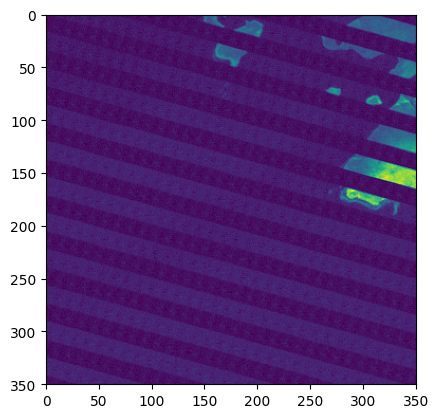

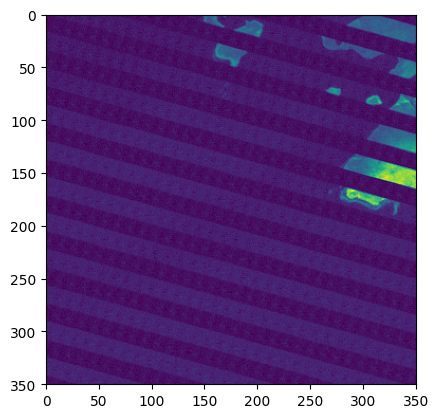

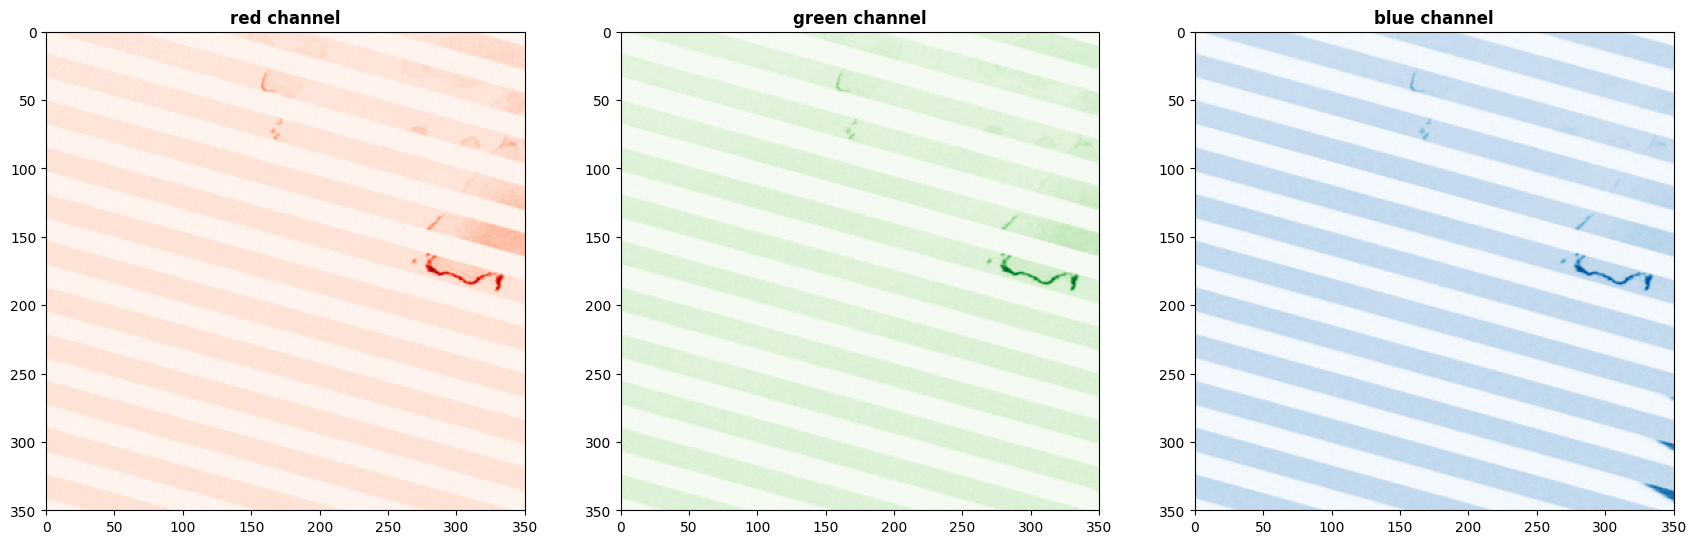

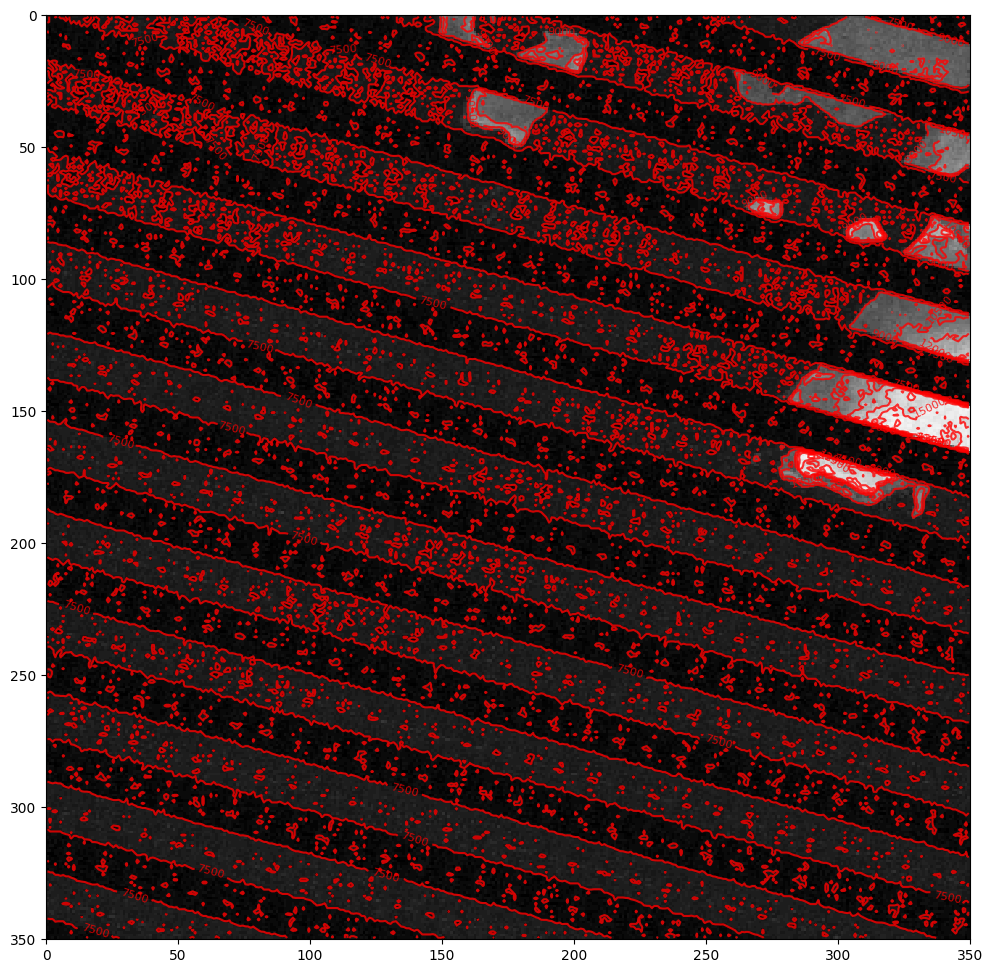

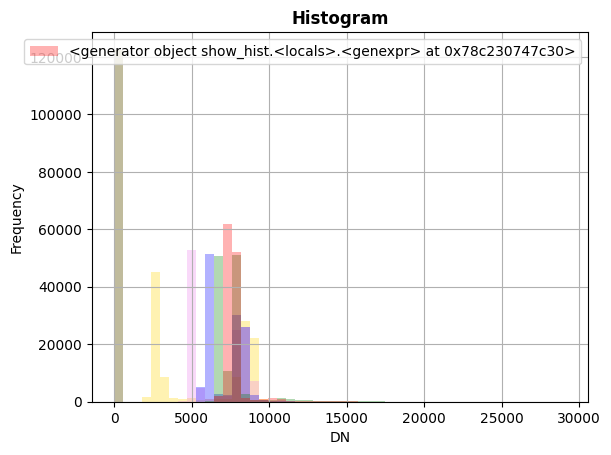

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 350, 'height': 350, 'count': 7, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
(350, 350)
(350, 350)
(350, 350)
(350, 350)
(350, 350)


In [25]:
for i in test_files_list:
  with rasterio.open(test_path+'/'+i) as src:
    show(src)
    show(src.read(1), transform=src.transform)
    fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
    show((src, 3), ax=axr, cmap='Reds', title='red channel')
    show((src, 4), ax=axg, cmap='Greens', title='green channel')
    show((src, 5), ax=axb, cmap='Blues', title='blue channel')
    fig, ax = pyplot.subplots(1, figsize=(12, 12))
    show((src, 1), cmap='Greys_r', interpolation='none', ax=ax)   #### SWIR band
    show((src, 1), contour=True, ax=ax)
    pyplot.show()

    show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")
    print(src.meta)
    for band in range(1,6):                    ###########   Exclude 6 and 7
      data_array = src.read(band)
      print(data_array.shape)
  break


In [26]:
XX = []
for i in test_files_list:
  with rasterio.open(test_path+'/'+i) as src:
    for band in range(1,6):                    ###########   Exclude 6 and 7
      datarray = src.read(band)
      XX.append(datarray)




/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [27]:
len(test_files_list)

1426

In [29]:
import numpy as np

In [30]:
XXX = np.array(XX)

In [31]:
XXX.shape

(7130, 350, 350)

In [33]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.8 MB/s eta 0:00:00


In [34]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [58]:
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
SWIR = XXX[0]
NIR = XXX[1]
RED = XXX[2]
GREEN = XXX[3]
BLUE = XXX[4]
ndvi = es.normalized_diff(NIR,RED)
mndwi = es.normalized_diff(GREEN,SWIR)

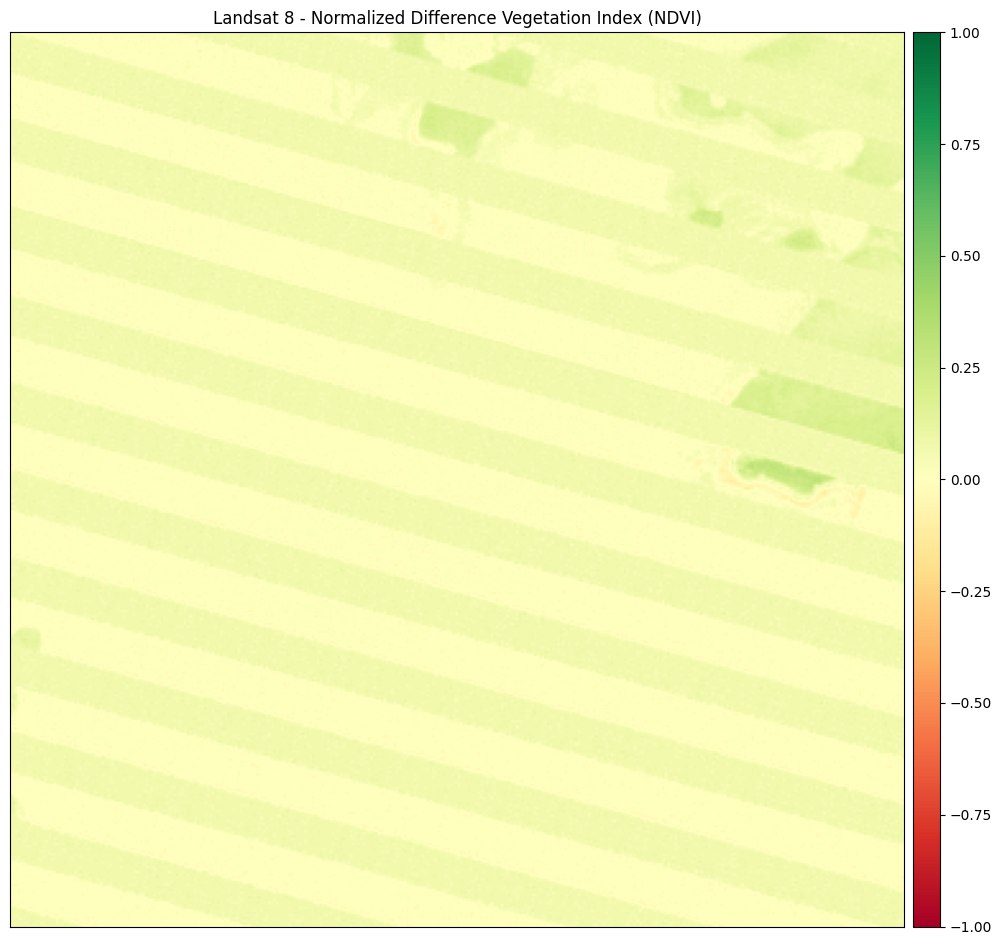

<Axes: title={'center': 'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [38]:
titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

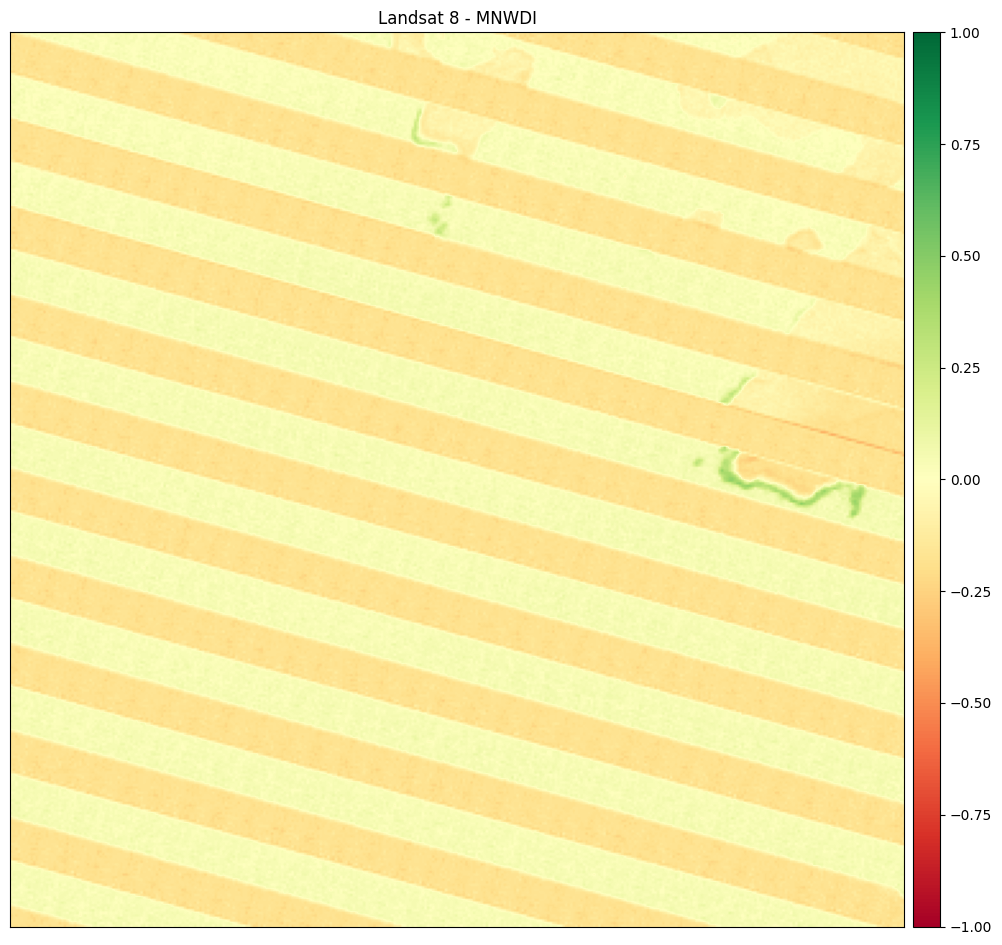

<Axes: title={'center': 'Landsat 8 - MNWDI'}>

In [61]:
titles = ["Landsat 8 - MNWDI"]

# Turn off bytescale scaling due to float values for MNWDI
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

In [39]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[1, 2, 3, 4],
             mask=False,
       fill_value=999999)

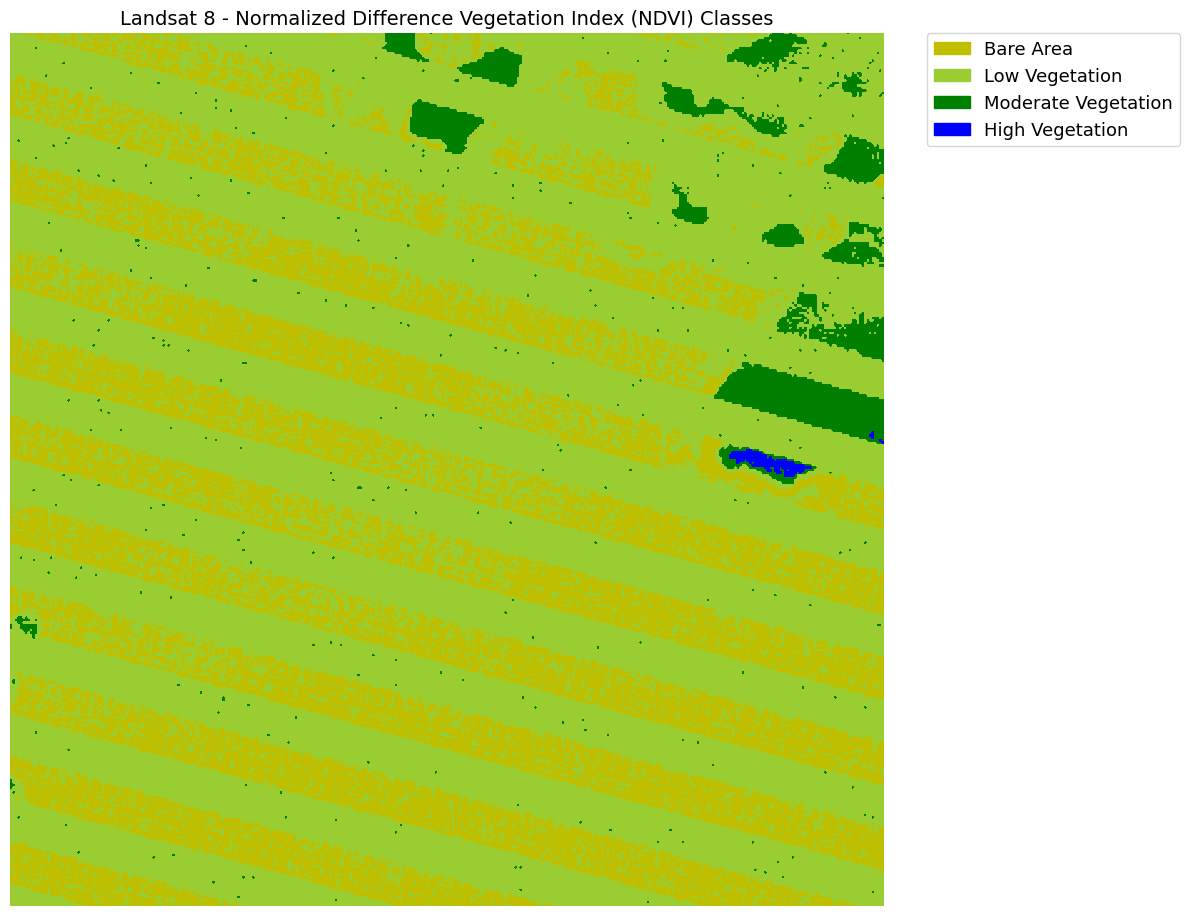

In [60]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [47]:
ndvi.shape

(350, 350)

In [48]:
ndvi.min()

-0.12474186886938565

In [49]:
ndvi.max()

0.31475252282556465

In [50]:
ndvi.mean()

0.03751749611602948

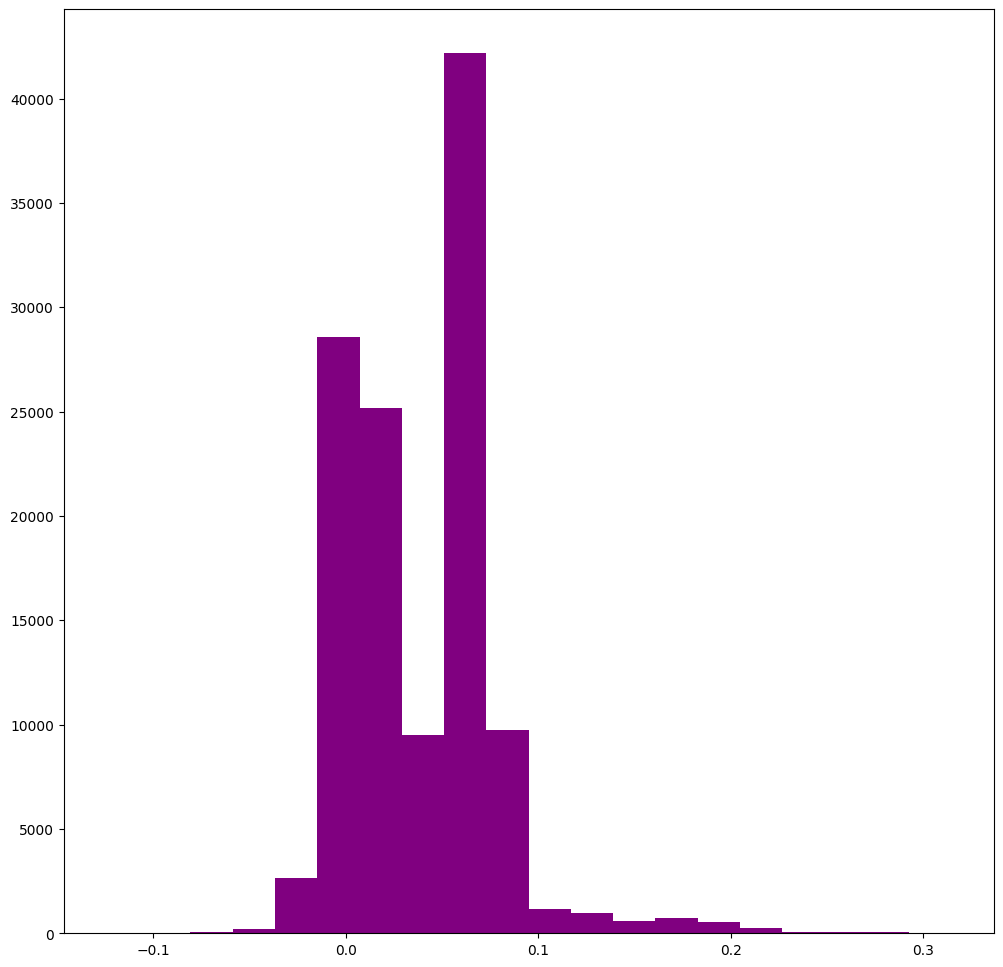

In [57]:
ep.hist(ndvi)
plt.show()